# Investment Decisions Model

### Written by Anushae Hassan under the direction of Professor David Backus, May 2016.

# Abstract


Equity funds are subject generally to market, market sector, market liquidity, issuer, and investment style risks, among other factors, to varying degrees. Three major Index Funds tracking the Standard & Poor's® 500 Composite Stock Price Index seek to match the performance of the S&P500. Dreyfus S&P 500 Index Fund (PEOPX), Spartan 500 Index Fund (FUSEX)and Vanguard 500 Index Fund (VFINX), each of them claims to be the 'better' and 'safer' option for its investors by minimizing the risks compared to its competitors. In this project as an investment manager or investor, I want to hold the market portfolio with returns corresponding to the return on the S&P 500 Index . To decide which would be the best index to invest in, the risk and return needs to be compared according to the capital asset pricing model. To make the investment decision, I compare the three funds and regress them against the S&P500 to see which one tracks the market most effeciently. Furthermore, the OLS regression would provide the beta of each index, showing the risk factor for each one of them. Beta is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole. The regression will also provide the Alpha each index. Alpha is also often referred to as “excess return” or “abnormal rate of return.” The abnormal rate of return on a security or portfolio in excess of what would be predicted by an equilibrium model like the capital asset pricing model (CAPM). This project develops an investment decision model based on expected returns and beta using the CAPM.

# Preliminaries
Importing packages

In [153]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import statsmodels.formula.api as smf  #stat module for regression
import seaborn as sns                  #seaborn graphics module

%matplotlib inline                     

# check versions
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Today:  2016-05-13


# Packages Imported 

The first package I have imported is pandas. It is a Python package that allows for fast data manipulation and analysis to organize my data set. In pandas, a dataframe allows for storing related columns of data. I use pandas.io.data to extract data from the data sets I have gathered for the S&P 500 and the mutual funds, it is directly formatted into a dataframe. 
The second package I imported is matplotlib which allows to plot various plots like scatter plots etc. 
Furthermore, I imported the statsmodel. Using statmodels.formula.api, a Python module used for a variety of statistical computations, I was able to run the OLS linear regressions of the S&P500 against the various mutual funds. Lastly, I used seaborn for a better graphical represenation of the regressions. 

# Creating the dataset

For the investment decision, I collected the data for the risk free rates, S&P500, Dreyfus S&P 500 Index Fund (PEOPX), Spartan 500 Index Fund (FUSEX)
and Vanguard 500 Index Fund (VFINX) 
I got the monthly historical data, that is: returns, from January 2007 to December 2014. 

For the risk free rates, I have used the three-month T-bill rate. This is available from the Federal Reserve Board of Governors, (https://www.stlouisfed.org/) I downladed the series named “3-Month Treasury Bill: Secondary Market Rate”. I then converted the rate from a percent to a decimal and then calculated the non annualized monthly risk free rates from the formula. Risk free rate is used in this project to adjust each fund by subtracting the rf from the monthly returns. This is to prevent the natural correlation between rf and all indices to effect the regression model. All the monthly returns in the data have been adjusted for the rf.

The data for S&P500 was provided by another data set which was adjusted for monthly (non annualized) holding period returns.

For the historical returns of the three mutual funds I used Yahoo! Finance
(http://finance.yahoo.com/)
I used the “Historical Prices” with frequency to be “monthly”. In the data,  “Open” is the price of the stock at the beginning of each month when the market just opens, “High” and “Low” stand for the highest and lowest price within each month, “Close” is the price at the end of the month before the exchange closes and the “Adj. Close” is the close price adjusted for dividend payment and stock split. Note that the trading volume(“Volume”) is always 0 just because investors do not directly buy and sell mutual funds on the exchange, instead the funds change hands with the company who manages the funds. The price we will use for this project is the “Close” price. 


In [154]:
file_rf = '/Users/anushaehassan/Desktop/S&P and MF Data/Rf.csv' # file location
df_rf = pd.read_csv(file_rf)

In [155]:
file_sp500 = '/Users/anushaehassan/Desktop/S&P and MF Data/S&P 500.csv' # file location
df_sp500 = pd.read_csv(file_sp500)

In [156]:
file_spartan = '/Users/anushaehassan/Desktop/S&P and MF Data/Spartan.csv' # file location
df_spartan = pd.read_csv(file_spartan)

In [157]:
file_vanguard = '/Users/anushaehassan/Desktop/S&P and MF Data/Vanguard.csv' # file location
df_vanguard = pd.read_csv(file_vanguard)

In [158]:
file_dreyfus = '/Users/anushaehassan/Desktop/S&P and MF Data/Dreyfus.csv' # file location
df_dreyfus = pd.read_csv(file_dreyfus)

# Cleaning the dataset

RF

In [159]:
#original dataframe
print('Dimensions:', df_rf.shape)
print('Variable dtypes:\n', df_rf.dtypes, sep='')
df_rf.head(15)

Dimensions: (108, 2)
Variable dtypes:
Title:                                          object
3-Month Treasury Bill: Secondary Market Rate    object
dtype: object


,Title:,3-Month Treasury Bill: Secondary Market Rate
0,Series ID:,TB3MS
1,Source:,Board of Governors of the Federal Reserve Syst...
2,Release:,H.15 Selected Interest Rates
3,Seasonal Adjustment:,Not Seasonally Adjusted
4,Frequency:,Monthly
5,Units:,Percent
6,Date Range:,2006-12-01 to 2014-12-01
7,Last Updated:,2016-04-04 3:41 PM CDT
8,Notes:,"Averages of Business Days, Discount Basis"
9,NaN,NaN


In [160]:
#cleaning
df_rf=df_rf.ix[11:]
df_rf.columns = ['DATE','RF']
df_rf = df_rf.drop(df_rf.index[0])
df_rf = df_rf.reset_index(drop=True)
df_rf['RF'] = df_rf['RF'].astype(float)
df_rf['RF'] = df_rf['RF']/100
df_rf['RF'] = (1/(1-((90/360)*(df_rf['RF']))))**(1/3)-1
df_rf.head()


,DATE,RF
0,January-07,0.004185
1,February-07,0.004227
2,March-07,0.004151
3,April-07,0.004092
4,May-07,0.003973


S & P 500

In [161]:
#original dataframe
print('Dimensions:', df_sp500.shape)
print('Variable dtypes:\n', df_sp500.dtypes, sep='')
df_sp500.head(10)

#Already clean and adjusted for HPR - dataset provided by professor

Dimensions: (96, 2)
Variable dtypes:
Date       object
vwretd    float64
dtype: object


,Date,vwretd
0,January-07,0.015318
1,February-07,-0.019288
2,March-07,0.010894
3,April-07,0.043991
4,May-07,0.034459
5,June-07,-0.016620
6,July-07,-0.031197
7,August-07,0.015094
8,September-07,0.037468
9,October-07,0.017360


In [162]:
#Functions to clean MFs

def original(df):
    print('Dimensions:', df.shape)
    print('Variable dtypes:\n', df.dtypes, sep='')
    print(df.head(10))
    
def clean(df):
    df.fillna(0,inplace=True)
    #df = df.rename(columns = {'Dividend ':'Dividend'},)
    df.drop(['Open','High','Low','Volume','Adj Close'],inplace=True,axis=1,errors='ignore')
    df['Close+Dividend']=df['Close']+df['Dividend']
    df['Monthly Returns']= (df['Close+Dividend'].shift(-1)/df['Close+Dividend'])-1
    df['Monthly Returns + 1']= df['Monthly Returns']+1
    print(df.head(10))
    
    
  
    

Dreyfus

In [163]:
original(df_dreyfus)

Dimensions: (97, 8)
Variable dtypes:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Dividend     float64
dtype: object
    Date       Open       High        Low      Close  Volume  Adj Close  \
0  6-Dec  41.209999  42.139999  40.000000  40.000000       0  28.829556   
1  7-Jan  39.959999  40.639999  39.759998  40.590000       0  29.254791   
2  7-Feb  40.820000  41.240002  39.549999  39.779999       0  28.670992   
3  7-Mar  39.680000  40.669998  38.860001  40.209999       0  28.983803   
4  7-Apr  40.310001  42.340000  40.310001  41.970001       0  30.252432   
5  7-May  42.080002  43.419998  42.080002  43.419998       0  31.297606   
6  7-Jun  43.580002  43.660000  42.299999  42.680000       0  30.764206   
7  7-Jul  43.130001  44.110001  41.340000  41.340000       0  29.798321   
8  7-Aug  41.639999  42.560001  40.020000  41.950001       0  30.238014   
9  7-Sep  42.389999  43.639999 

In [164]:
clean(df_dreyfus)

    Date      Close  Dividend  Close+Dividend  Monthly Returns  \
0  6-Dec  40.000000     0.000       40.000000         0.014750   
1  7-Jan  40.590000     0.000       40.590000        -0.019956   
2  7-Feb  39.779999     0.000       39.779999         0.010910   
3  7-Mar  40.209999     0.004       40.213999         0.043666   
4  7-Apr  41.970001     0.000       41.970001         0.034548   
5  7-May  43.419998     0.000       43.419998        -0.017043   
6  7-Jun  42.680000     0.000       42.680000        -0.031396   
7  7-Jul  41.340000     0.000       41.340000         0.014756   
8  7-Aug  41.950001     0.000       41.950001         0.036949   
9  7-Sep  43.500000     0.000       43.500000         0.015632   

   Monthly Returns + 1  
0             1.014750  
1             0.980044  
2             1.010910  
3             1.043666  
4             1.034548  
5             0.982957  
6             0.968604  
7             1.014756  
8             1.036949  
9             1.015632 

Spartan

In [165]:
original(df_spartan)

Dimensions: (97, 8)
Variable dtypes:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Dividend     float64
dtype: object
    Date       Open       High        Low      Close  Volume  Adj Close  \
0  6-Dec  49.590000  50.700001  49.590000  50.180000       0  41.259762   
1  7-Jan  50.130001  50.990002  49.880001  50.939999       0  41.884659   
2  7-Feb  51.220001  51.770000  49.639999  49.939999       0  41.062424   
3  7-Mar  49.810001  51.070000  48.779999  50.490002       0  41.514656   
4  7-Apr  50.619999  52.939999  50.619999  52.490002       0  43.354263   
5  7-May  52.630001  54.320000  52.630001  54.320000       0  44.865753   
6  7-Jun  54.520000  54.619999  52.919998  53.410000       0  44.114136   
7  7-Jul  53.980000  54.980000  51.540001  51.540001       0  42.750988   
8  7-Aug  51.919998  53.080002  49.900002  52.310001       0  43.389683   
9  7-Sep  52.860001  54.430000 

In [166]:
clean(df_spartan)

    Date      Close  Dividend  Close+Dividend  Monthly Returns  \
0  6-Dec  50.180000      0.24       50.420000         0.010313   
1  7-Jan  50.939999      0.00       50.939999        -0.019631   
2  7-Feb  49.939999      0.00       49.939999         0.011013   
3  7-Mar  50.490002      0.00       50.490002         0.044167   
4  7-Apr  52.490002      0.23       52.720002         0.030349   
5  7-May  54.320000      0.00       54.320000        -0.016753   
6  7-Jun  53.410000      0.00       53.410000        -0.030706   
7  7-Jul  51.540001      0.23       51.770001         0.010431   
8  7-Aug  52.310001      0.00       52.310001         0.037469   
9  7-Sep  54.270000      0.00       54.270000         0.015847   

   Monthly Returns + 1  
0             1.010313  
1             0.980369  
2             1.011013  
3             1.044167  
4             1.030349  
5             0.983247  
6             0.969294  
7             1.010431  
8             1.037469  
9             1.015847 

Vanguard

In [167]:
original(df_vanguard)

Dimensions: (97, 8)
Variable dtypes:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Dividend     float64
dtype: object
    Date        Open        High         Low       Close  Volume   Adj Close  \
0  6-Dec  129.080002  131.960007  129.080002  130.589996       0  108.344292   
1  7-Jan  130.449997  132.690002  129.820007  132.539993       0  109.962112   
2  7-Feb  133.279999  134.699997  129.190002  129.929993       0  107.796715   
3  7-Mar  129.600006  132.660004  126.919998  130.830002       0  108.995476   
4  7-Apr  131.169998  137.800003  131.169998  136.610001       0  113.810837   
5  7-May  136.970001  141.360001  136.970001  141.360001       0  117.768097   
6  7-Jun  141.889999  142.149994  137.429993  138.429993       0  115.796158   
7  7-Jul  139.910004  143.149994  134.149994  134.149994       0  112.215958   
8  7-Aug  135.130005  138.149994  129.869995  136.160004     

In [168]:
clean(df_vanguard)

    Date       Close  Dividend  Close+Dividend  Monthly Returns  \
0  6-Dec  130.589996      0.65      131.239996         0.009905   
1  7-Jan  132.539993      0.00      132.539993        -0.019692   
2  7-Feb  129.929993      0.00      129.929993         0.011160   
3  7-Mar  130.830002      0.55      131.380002         0.039808   
4  7-Apr  136.610001      0.00      136.610001         0.034771   
5  7-May  141.360001      0.00      141.360001        -0.016695   
6  7-Jun  138.429993      0.57      138.999993        -0.034892   
7  7-Jul  134.149994      0.00      134.149994         0.014983   
8  7-Aug  136.160004      0.00      136.160004         0.037236   
9  7-Sep  140.610001      0.62      141.230001         0.011329   

   Monthly Returns + 1  
0             1.009905  
1             0.980308  
2             1.011160  
3             1.039808  
4             1.034771  
5             0.983305  
6             0.965108  
7             1.014983  
8             1.037236  
9           

# Plotting the data

In [169]:
#Plotting the data simply to observe the similiar underlying trend of the stock market S&P 500 and the 3 mutual funds. 

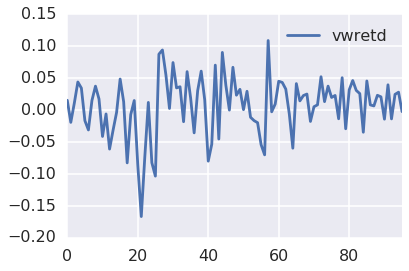

In [170]:
df_sp500.plot()

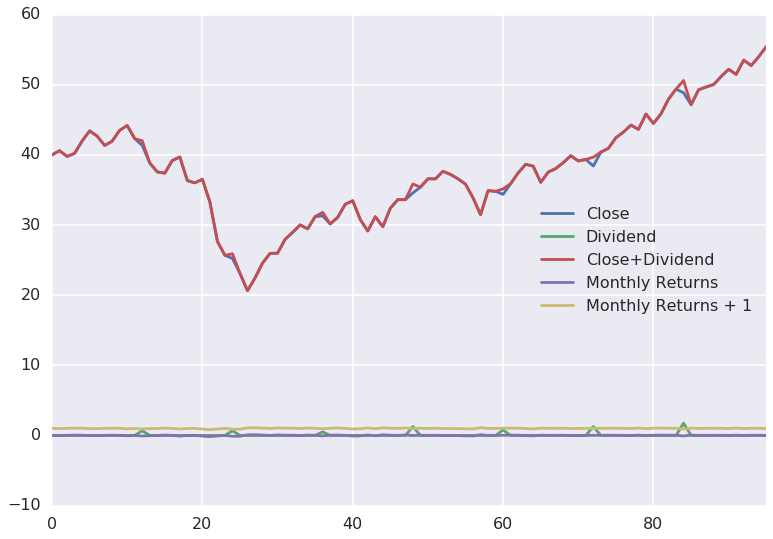

In [192]:
df_dreyfus.plot()

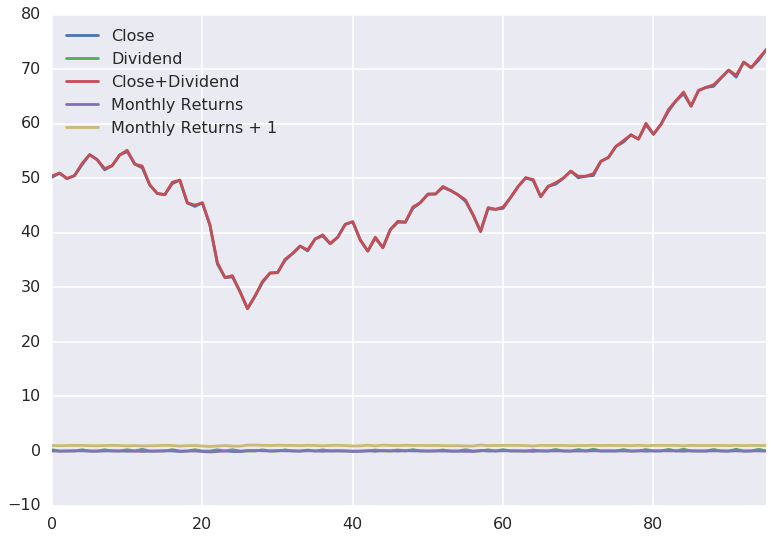

In [193]:
df_spartan.plot()

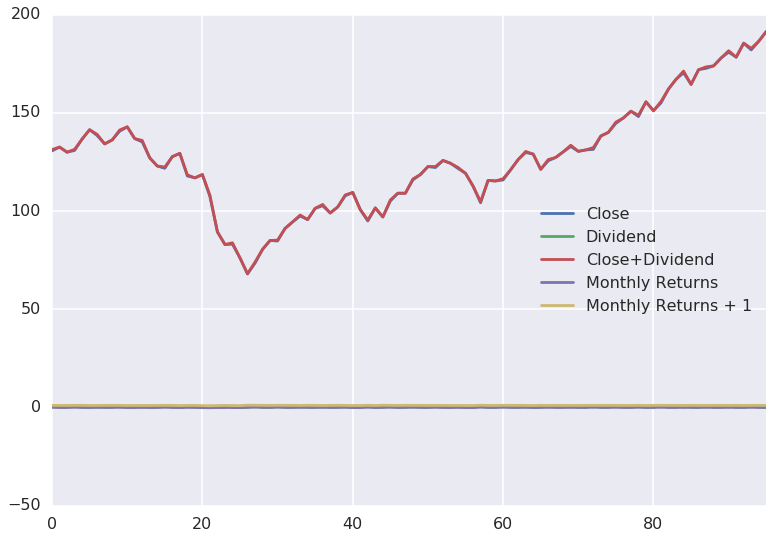

In [194]:
df_vanguard.plot()

In [177]:
#We can also plot the monthly returns of the funds to have a better understanding of the trends. 

In [178]:
def plotting(mf,name):
    dates = pd.date_range('2006-12', '2014-12', freq='M')
    mf.drop(mf.index[-1:],inplace=True)
    d =  {'X': dates, 'Y': mf['Monthly Returns']}
    df = pd.DataFrame(data=d)
    print(name)
    df.plot()

Dreyfus


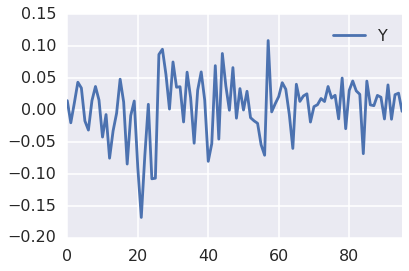

In [179]:
plotting(df_dreyfus,'Dreyfus')

Spartan


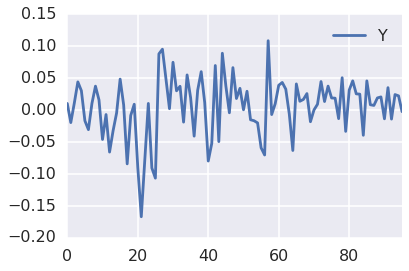

In [180]:
plotting(df_spartan,'Spartan')

Vanguard


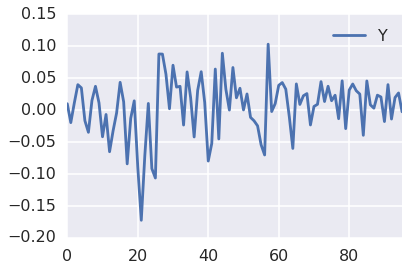

In [181]:
plotting(df_vanguard,'Vanguard')

In [182]:
#Plotting the closing prices for each of the funds to get the comaprison in absoulte terms

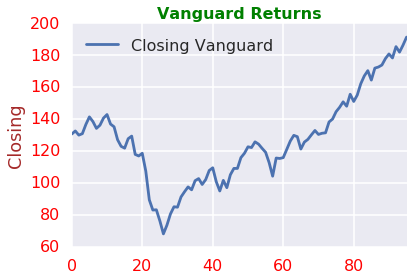

In [183]:
fig, ax = plt.subplots()

df_vanguard['Close'].plot(ax=ax)       
ax.set_title('Vanguard Returns', fontsize=16, loc='center', color= 'green', weight='bold')
ax.set_ylabel('Closing', color= 'brown')
ax.legend(['Closing Vanguard'], loc=0)  
ax.tick_params(labelcolor='red')             


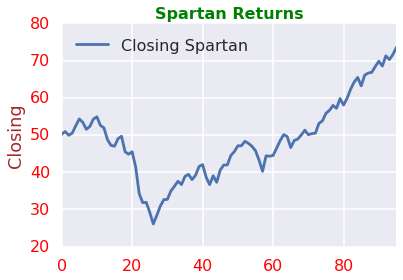

In [184]:
fig, ax = plt.subplots()

df_spartan['Close'].plot(ax=ax)       
ax.set_title('Spartan Returns', fontsize=16, loc='center', color= 'green', weight='bold')
ax.set_ylabel('Closing', color= 'brown')
ax.legend(['Closing Spartan'], loc=0)  
ax.tick_params(labelcolor='red')               

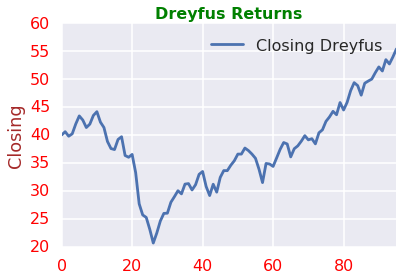

In [185]:
fig, ax = plt.subplots()

df_dreyfus['Close'].plot(ax=ax)       
ax.set_title('Dreyfus Returns', fontsize=16, loc='center', color= 'green', weight='bold')
ax.set_ylabel('Closing', color= 'brown')
ax.legend(['Closing Dreyfus'], loc=0)  
ax.tick_params(labelcolor='red')               

# Comparison

In [186]:
#We can also plot them together on one graph to see a better comparison.

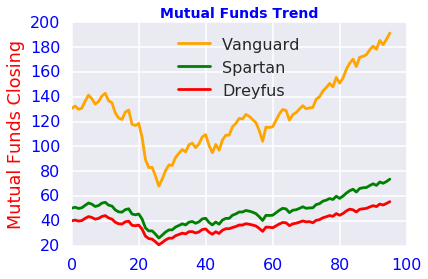

In [187]:
plt.plot(df_vanguard.index, df_vanguard['Close'], color= 'orange')
plt.plot(df_spartan.index, df_spartan['Close'], color= 'green')
plt.plot(df_dreyfus.index, df_dreyfus['Close'], color= 'red')

plt.title('Mutual Funds Trend', fontsize=14, loc='center', color='blue', weight='bold') #add title
plt.ylabel('Mutual Funds Closing', color='Red')           # y axis label 
plt.tick_params(labelcolor='blue')            # change tick labels to red
plt.legend(['Vanguard', 'Spartan', 'Dreyfus'], loc=0)  

# Regression Analysis

In [188]:
def regress(mf,name):
    d =  {'X': df_sp500['vwretd'], 'Y': mf['Monthly Returns']}
    df = pd.DataFrame(data=d)
    df.drop(df.index[-1:],inplace=True)
    df['X']=df['X']-df_rf['RF']
    df['Y']=df['Y']-df_rf['RF']
    r = smf.ols(formula='Y ~ X', data=df).fit()
    print(r.summary(),end='\n\n\n\n\n')
    print('Coefficients:')
    print(r.params)
    
    #actually plotting
    
    plt.style.use('seaborn-poster')
    plt.plot(df['X'], df['Y'], 'ro')
    plt.plot(df['X'], np.poly1d(np.polyfit(df['X'], df['Y'], 1))(df['X']),'b')
    plt.legend(['Data', 'Fitted model'])
    plt.xlabel(name)
    plt.ylabel('S&P 500')
    plt.title('{0} Regression Analysis'.format(name))
    plt.show()
    
    
    sns.regplot(df['X'],df['Y']) #same plot using seaborn
    

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4074.
Date:                Fri, 13 May 2016   Prob (F-statistic):           1.36e-78
Time:                        20:36:51   Log-Likelihood:                 335.30
No. Observations:                  95   AIC:                            -666.6
Df Residuals:                      93   BIC:                            -661.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0025      0.001     -3.313      0.0

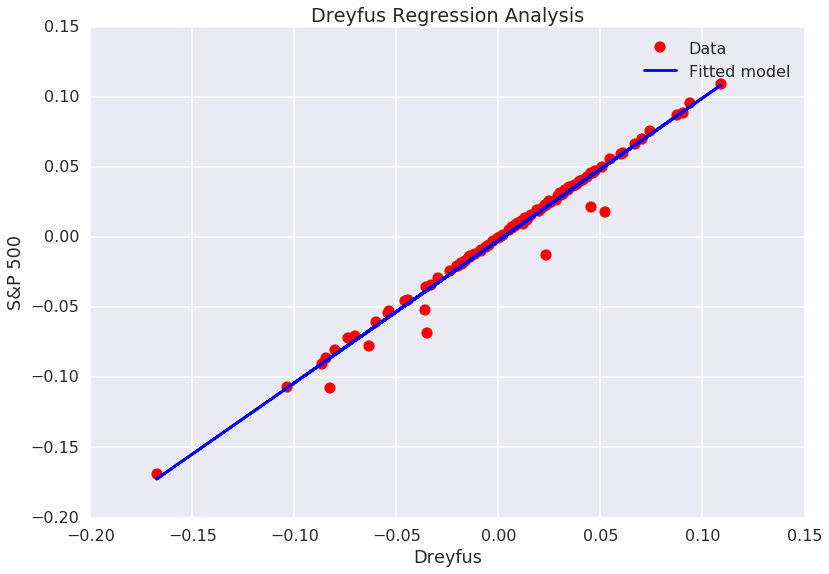

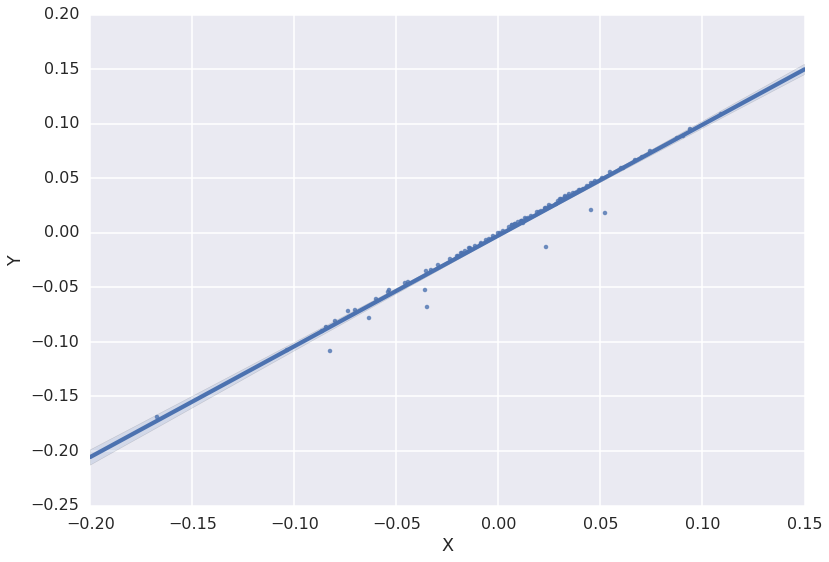

In [189]:
regress(df_dreyfus,'Dreyfus')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.536e+04
Date:                Fri, 13 May 2016   Prob (F-statistic):          7.83e-122
Time:                        20:36:52   Log-Likelihood:                 438.61
No. Observations:                  95   AIC:                            -873.2
Df Residuals:                      93   BIC:                            -868.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0019      0.000     -7.630      0.0

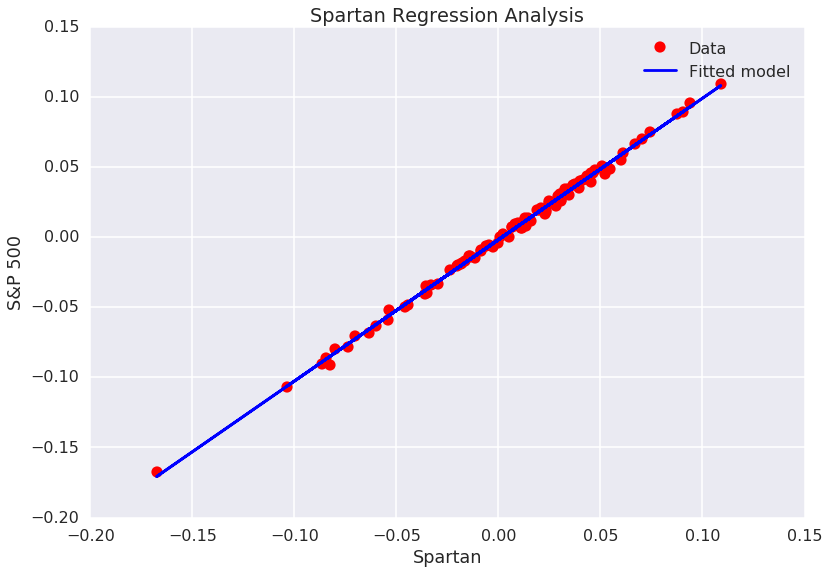

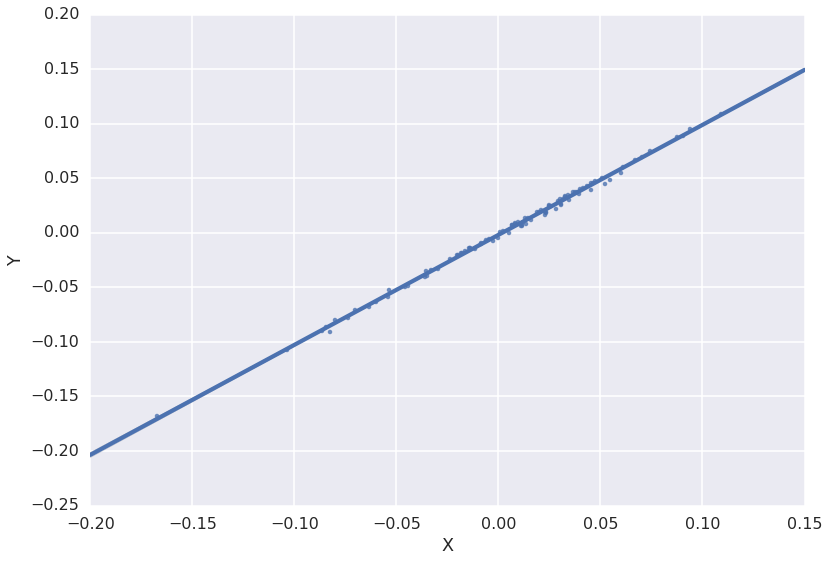

In [190]:
regress(df_spartan,'Spartan')

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.881e+04
Date:                Fri, 13 May 2016   Prob (F-statistic):          1.04e-117
Time:                        20:36:53   Log-Likelihood:                 429.61
No. Observations:                  95   AIC:                            -855.2
Df Residuals:                      93   BIC:                            -850.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0019      0.000     -6.838      0.0

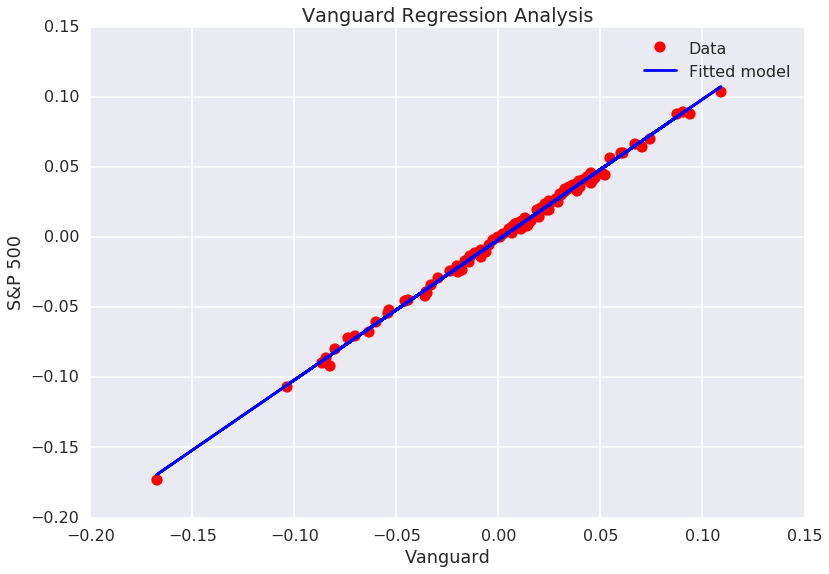

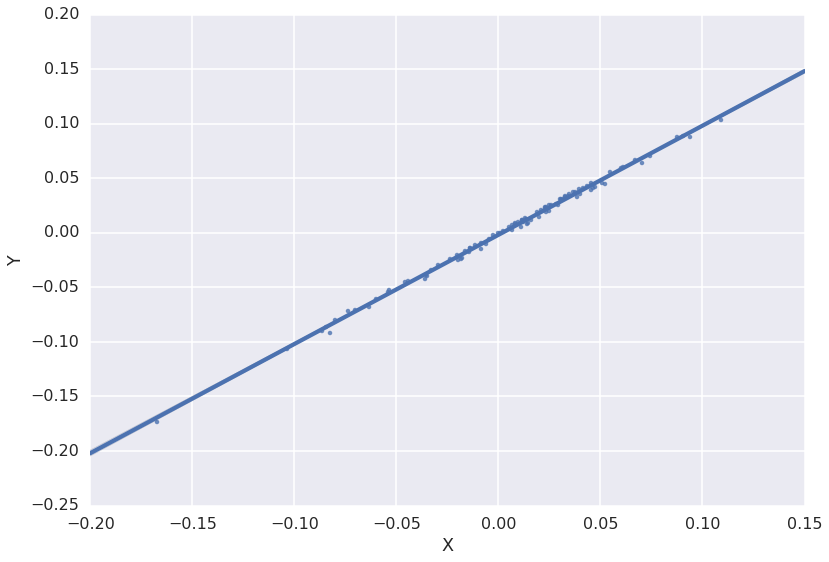

In [191]:
regress(df_vanguard,'Vanguard')

### Regression results summary:

#### Dreyfus

Coefficients:

Intercept   -0.00246

X            1.01517

#### Spartan

Coefficients:

Intercept   -0.001910

X            1.008039

#### Vanguard

Coefficients:

Intercept   -0.001882

X            1.000424


### The intercept is the alpha and the X is the beta of each fund 

# Conclusion


The above plots and regressions provide significant results from an investment manager or investor's point of view.

Some key notes to be taken into consideration are the effect of rf, dividends and monthly returns +1 (HPRs). We used the risk free rate to adjust funds and S&P500 by subtracting the rf from the monthly returns of each. This is to prevent the natural correlation between rf and all indices to effect the regression model. All the monthly returns in the data have been adjusted for the rf. Another important adjustment is that of the dividends. We added the dividends in the monthly returns. The monthly returns were then converted into the HPR (Holding Period Returns) to see the return at the end of eac holding period hence a month. To see what one dollar held for one period would turn into we use the monthly return+1, which is for our understanding purpose of the absolute return. However, in the calculation and regressions we will use monthly-rf for each fund and S&P500 as that is the adjusted number for purpose of our analysis.

The individual graphs plotting the closing of each fund and the monthly returns show that infact the claim of each fund of tracking the S&P or matching its returns is true, as they show a very similar earning patterns compared to the S&P. 

In the graph comapring the three mutual funds together, Dreyfus and Spartan are on a similar scale, while Vanguard is higher than the two. Although the underlying returns trend is similar for the three of them, Vanguard is generally higher in absolute terms. These differences can be due to the kind of investments each of the index makes. 

Analysing the investment policy of the funds helps to undersatnd the difference in their returns and risk exposure. Vanguard invests in 500 of the largest U.S. companies, which span many different industries and account for about three-fourths of the U.S. stock market’s value. The key risk for the fund is the volatility that comes with its full exposure to the stock market. Because the 500 Index Fund is broadly diversified within the large-capitalization market, it may be considered a core equity holding in a portfolio. While Spartan only includes large and some mid-cap stocks preventing investors from getting exposure to the entire U.S. stock market. Like a fine wine, the fund could be paired with other mid-cap small-cap funds to get a more complete exposure to U.S. equities. Lastly, Dreyfus fund's policy is generally to fully invest in stocks included in the S&P 500® Index and in futures whose performance is tied to the index. The fund generally invests in all 500 stocks in the S&P 500® Index in proportion to their weighting in the index. 

To find the risk of the fund compared to the market, I regressed Dreyfus, Spartan and Vanguard against the S&P500, individually to get each one's beta and alpha. The regression analysis results show two important coefficients, the intercept which is the 'alpha' and the X which is the 'beta' of each fund. An investor would prefer an asset with a high alpha (higher excess return than CAPM) and a low beta (risk). Hence, from the above regression summary we can conclude that Vanguard fund would be the best investment option as it has the beta closest to 1 and hence would move more in tune with the S&P 500, the benchmark index. Furthermore, its alpha is the least negative, hence highest amongst the other two. 

In general this would be a useful model to observe the trends of different funds matching the market returns and decide which would be a better option by comapring their alpha and beta.
